# Assignment 2

In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Extra Task
Implement matrix multiplication of two matrices

In [2]:
def isCorrectMatrix(x):
    # check type of matrix (list or tuple are allowed)
    if type(x) != type([]) and type(x) != type(tuple()):
        return False
    for i in range(len(x)):
        # if rows are not lists or tuples
        if type(x[i]) != type([]) and type(x[i]) != type(tuple()):
            return False
        # if rows are not equal length
        if len(x[i]) != len(x[0]):
            return False
        # if array element is not numeric (integer or float)
        for j in range(len(x[i])):
            if type(x[i][j])!= type(1) and type(x[i][j]) != 1.0:
                return False
    return True

# unit test for isCorrectMatrix function
# x is 2x3 matrix
x = [[1, 2, 3], [4, 5, 6]]
# y is 3x4 matrix
y = [[10, 10, 10, 10], [20, 20, 20, 20], [30, 30, 30, 30]]
# print(isCorrectMatrix(x))
# print(isCorrectMatrix(y))
# falseMatrix1 = [[1, 2], [1, 2, 3]]
# print(isCorrectMatrix(falseMatrix1))
# falseMatrix2 = [[1, 2, 'a'], [1, 2, 3]]
# print(isCorrectMatrix(falseMatrix2))
# falseMatrix3 = [[1, 2, 3], [1, 2, 3], ['a', 'b', 'c']]
# print(isCorrectMatrix(falseMatrix3))

def multiplyMatrices(x, y):
    if not isCorrectMatrix(x) or not isCorrectMatrix(y):
        return "Matrix are not of correct format"
    # columns count of first matrix should be equal to the rows count of the second matrix
    if len(x[0]) != len(y):
        return "First matrix columns count are not equal to the second's rows count"
    # initialize result matrix rows(x)xcolumns(y)
    result = len(x) * [0]
    for i in range(len(result)):
        result[i] = len(y[0]) * [0]
    for i in range(len(x)):
        for j in range(len(y[0])):
            for k in range(len(y)):
                result[i][j] += x[i][k] * y[k][j]
    return result

# unit test for multiplyMatrices function
# 1x2 matrix
X = [[18, 9]]
# 2x3 matrix
Y = [[1,2,3], [4,5,6]]
# 2x3
falseMatrix1 = [[18, 9, 12], [23, 23, 23]]
print(multiplyMatrices(falseMatrix1, falseMatrix1))
print(multiplyMatrices(X, Y))

First matrix columns count are not equal to the second's rows count
[[54, 81, 108]]


### Extra Task
Implement Hadamard product of two matrices

In [3]:
def IsEqualLengthMatrices(x, y):
    if len(x) != len(y):
        return False
    for i in range(len(x)):
        if len(x[i]) != len(y[i]):
            return False
    return True

def hadamardProduct(a, b):
    if not isCorrectMatrix(a) or not isCorrectMatrix(b):
        return "Matrice is of wrong format"  
    # initialize result matrix rows(x)xcolumns(x)
    result = len(a) * [0]
    for i in range(len(result)):
        result[i] = len(a[0]) * [0]
    # hadamard product
    for i in range(len(a)):
        for j in range(len(a[i])):
            result[i][j] = a[i][j] * b[i][j]
    return result

# unit tests
# not correct type
arr1 = [[1, 'a'], [3, 4, 5]]
arr2 = [[10, 11], [1, 1, 1]]
print(hadamardProduct(arr1, arr2))
# not equal columns count
arr1 = [[1, 2, 3], [3, 4, 5]]
arr2 = [[10, 11], [1, 1, 1]]
print(hadamardProduct(arr1, arr2))
# not equal rows count
arr1 = [[1, 2], [3, 4, 5], [6]]
arr2 = [[10, 11], [1, 1, 1]]
print(hadamardProduct(arr1, arr2))
# matrix arr[1] and arr[2] columns are not equal length
arr1 = [[1, 2], [3, 4, 5], [6]]
arr2 = [[10, 11], [1, 1, 1], [5]]
print(hadamardProduct(arr1, arr2))
arr1 = [[1, 2, 3], [3, 4, 5]]
arr2 = [[10, 5, 10], [6, 7, 8]]
print(hadamardProduct(arr1, arr2))

Matrice is of wrong format
Matrice is of wrong format
Matrice is of wrong format
Matrice is of wrong format
[[10, 10, 30], [18, 28, 40]]


### Data 

#### Please use HW_gender data from Assignment 1. Use the weight to predict the height of a person. You can try different variants: per gender or for overall data. Please argue why did you prefer one variant over another in the report. 

In [35]:
def drawRegression(data_X_train, data_X_test, data_y_train, data_y_test):
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(data_X_train, data_y_train)

    # Make predictions using the testing set
    data_y_pred = regr.predict(data_X_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(data_y_test, data_y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(data_y_test, data_y_pred))

    # Plot outputs
    plt.scatter(data_X_test, data_y_test,  color='black')
    plt.plot(data_X_test, data_y_pred, color='blue', linewidth=3)
    plt.xlabel('Weight')
    plt.ylabel('Height')
    plt.title('Linear regression (using weight to predict height)')

    plt.xticks(())
    plt.yticks(())

    plt.show()
    
    return regr

Coefficients: 
 [[ 5.96280004]]
Mean squared error: 97.35
Variance score: 0.74


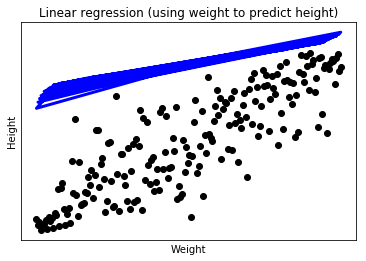

[[ 192.84768481]]


In [36]:
# Male case
fileName = 'HW_gender.csv'
data = pd.read_csv(fileName)
maleData = data[data['Gender'] == 'Male']

# Split the data into training/testing sets
data_X_train = maleData[['Weight']][:-200]
data_X_test = maleData[['Weight']][-200:]

# Split the targets into training/testing sets
data_y_train = maleData[['Height']][:-200]
data_y_test = maleData[['Height']][-200:]
# regression for male data
maleRegr = drawRegression(data_X_train, data_X_test, data_y_train, data_y_test)
# predicting height by weight
manual_test = pd.DataFrame(np.array([[70]]))
print(maleRegr.predict(manual_test))

Coefficients: 
 [[ 6.00944308]]
Mean squared error: 99.02
Variance score: 0.71


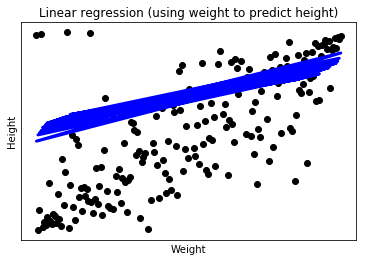

[[ 173.6192615]]


In [30]:
femaleData = data[data['Gender'] == 'Female']

# Split the data into training/testing sets
data_X_train = femaleData[['Weight']][:-200]
data_X_test = femaleData[['Weight']][-200:]

# Split the targets into training/testing sets
data_y_train = femaleData[['Height']][:-200]
data_y_test = femaleData[['Height']][-200:]
# regression for male data
femaleRegr = drawRegression(data_X_train, data_X_test, data_y_train, data_y_test)
# predicting height by weight
manual_test = pd.DataFrame(np.array([[70]]))
print(femaleRegr.predict(manual_test))

Coefficients: 
 [[ 7.72408992]]
Mean squared error: 143.03
Variance score: 0.57


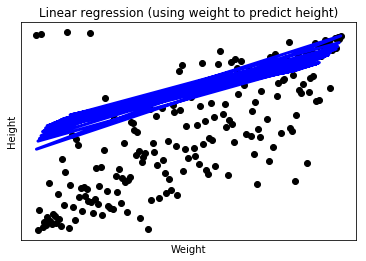

[[ 189.57317762]]


In [9]:
# General case
# Split the data into training/testing sets
data_X_train = data[['Weight']][:-200]
data_X_test = data[['Weight']][-200:]

# Split the targets into training/testing sets
data_y_train = data[['Height']][:-200]
data_y_test = data[['Height']][-200:]
# regression for male data
regr = drawRegression(data_X_train, data_X_test, data_y_train, data_y_test)
# predicting height by weight
manual_test = pd.DataFrame(np.array([[70]]))
print(regr.predict(manual_test))

# Linear Regression 

### Implement "loss" function
 

In [11]:
# L2 loss of regression (MSE) using regression coefficient and intercept
def getLoss(data, regr):
    X = data[['Weight']].values
    Y = data[['Height']].values

    #total number of values
    n = len(X)
    coefficient = regr.coef_[0][0]
    intercept = regr.intercept_[0]

    mse = 0
    for i in range(n):
        y_p = intercept + coefficient * X[i]
        mse += (y_p - Y[i])**2

    return mse / n

print('female data loss is:', getLoss(femaleData, femaleRegr))
print('male data loss is:', getLoss(maleData, maleRegr))

# Loss function using gradient descent
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
# LOSS FUNCTION with Gradient DESCENT
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, points.shape[0]):
        x = points['Weight'].iloc[i]
        y = points['Height'].iloc[i]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(points.shape[0])


female data loss is: [ 100.63914109]
male data loss is: [ 99.86515064]


### Implement "fit" function gradient descent 

In [12]:
# FIT FUNCTION
def step_gradient(b_current, m_current, points, learningRate, loss_history):
    b_gradient = 0
    m_gradient = 0
    N = float(points.shape[0])
    for i in range(0, points.shape[0]):
        x = points['Weight'].iloc[i]
        y = points['Height'].iloc[i]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    loss_history.append(compute_error_for_line_given_points(new_b, new_m, points))
    return [new_b, new_m, loss_history]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    loss_history = []
    for i in range(num_iterations):
        b, m, loss_history = step_gradient(b, m, points, learning_rate, loss_history)
    return [b, m, loss_history]

# the function is general, so we can run with only femaleData and maleData separately
def run(learning_rate, num_iterations, data):
    points = data[['Weight', 'Height']]
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m, loss_history] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    return(b, m, loss_history)

learning_rate = 0.0001
num_iterations = 100
b, m, loss_history = run(learning_rate, num_iterations, data)

Starting gradient descent at b = 0, m = 0, error = 27093.837574561636
Running...
After 100 iterations b = 0.013296220587563036, m = 2.450015609292634, error = 561.341689893197


### Implement "predict" function 

In [13]:
coefficients = {}

# predict height of specific weight (one by one)
def predict(x, data, gender):
    global coefficients
    b, m, loss_history = run(learning_rate, num_iterations, data)
    coefficients['b ' + gender] = b
    coefficients['m ' + gender] = m
    coefficients['loss_history ' + gender] = loss_history
    return m*x + b

print("Predicted height for 70kg in general case is:", predict(70, data, 'general'))
print("Predicted height for 70kg male is:", predict(70, maleData, 'male'))
print("Predicted height for 70kg female is:", predict(70, femaleData, 'female'))

# returns array of heights at once
def predict_data(data, gender):
    predicted_height = []
    for weight in data['Weight'].values:
        predicted_height.append(coefficients['m ' + gender] * weight + coefficients[' ' + gender])
    return predicted_height

# print("Predicted heights for general data is:", predict_data(data))
# print("Predicted heights for male data is:", predict_data(maleData))
# print("Predicted heights for female data is:", predict_data(femaleData))

Starting gradient descent at b = 0, m = 0, error = 27093.837574561636
Running...
After 100 iterations b = 0.013296220587563036, m = 2.450015609292634, error = 561.341689893197
Predicted height for 70kg in general case is: 171.514388871
Starting gradient descent at b = 0, m = 0, error = 35367.928366577085
Running...
After 100 iterations b = 0.03154596068660793, m = 2.71453770341416, error = 186.44908904703584
Predicted height for 70kg male is: 190.0491852
Starting gradient descent at b = 0, m = 0, error = 18819.74678254601
Running...
After 100 iterations b = 0.024718667032432952, m = 2.1390316388358035, error = 208.84659859983418
Predicted height for 70kg female is: 149.756933386


### Depict the plot of loss over iterations
 

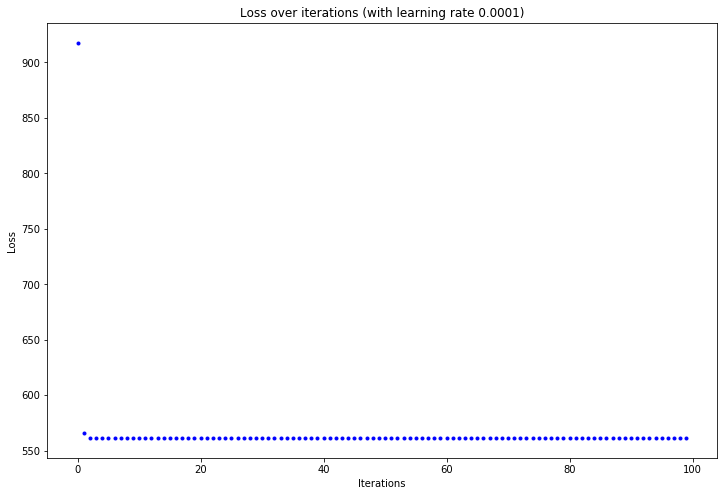

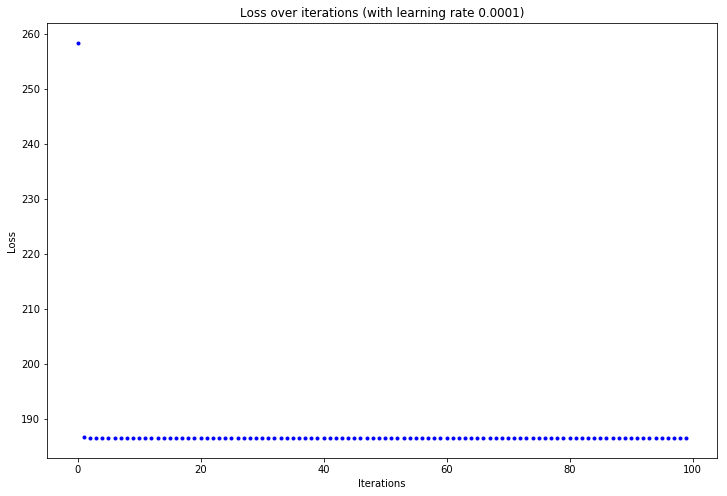

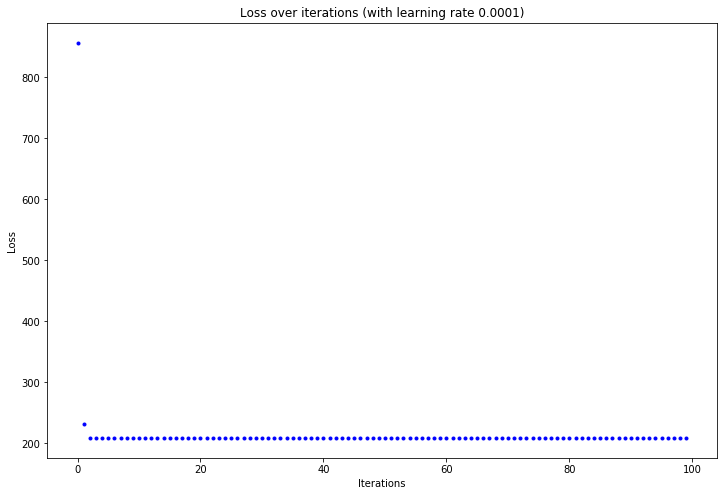

In [38]:
def plot_GD(learning_rate, num_iterations, loss_history):
#     b, m, loss_history = run(learning_rate, num_iterations, data)
    fig,ax = plt.subplots(figsize=(12,8))

    ax.set_title('Loss over iterations (with learning rate {})'.format(learning_rate))
    ax.set_ylabel('Loss')
    ax.set_xlabel('Iterations')
    _=ax.plot(range(num_iterations),loss_history,'b.')

# plot of loss in general case
plot_GD(0.0001, num_iterations, coefficients['loss_history general'])
# plot of loss for male data
plot_GD(0.0001, num_iterations, coefficients['loss_history male'])
# plot of loss for female data
plot_GD(0.0001, num_iterations, coefficients['loss_history female'])


### Choose the "learning rate" value, show the comparison to other values via loss plot
 

Starting gradient descent at b = 0, m = 0, error = 27093.837574561636
Running...
After 100 iterations b = -9.419744571498273e+51, m = -6.27265876119996e+53, error = 1.7396740924754293e+111
Starting gradient descent at b = 0, m = 0, error = 27093.837574561636
Running...
After 100 iterations b = -9.70075812761781e+38, m = -6.459787205228382e+40, error = 1.845019648546071e+85
Starting gradient descent at b = 0, m = 0, error = 27093.837574561636
Running...
After 100 iterations b = -2.3649461848493765e+20, m = -1.5748304312886616e+22, error = 1.0965594154821381e+48
Starting gradient descent at b = 0, m = 0, error = 27093.837574561636
Running...
After 100 iterations b = -0.01019295121385607, m = 2.4503683496561406, error = 561.2865033868454
Starting gradient descent at b = 0, m = 0, error = 27093.837574561636
Running...
After 100 iterations b = 0.013296220587563037, m = 2.450015609292634, error = 561.341689893197


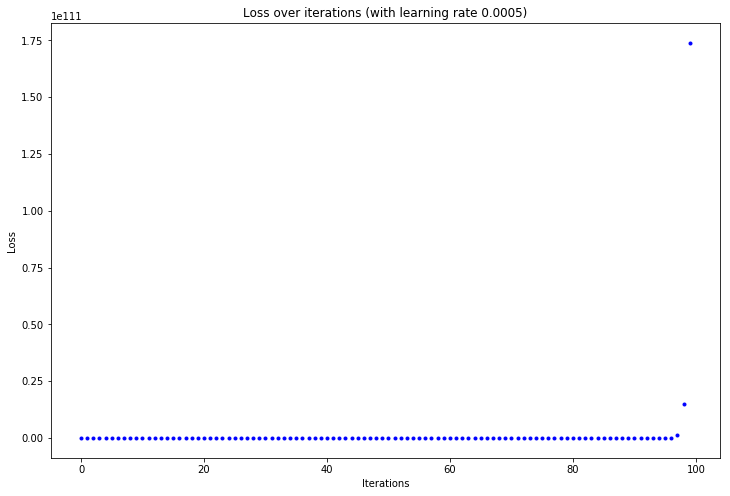

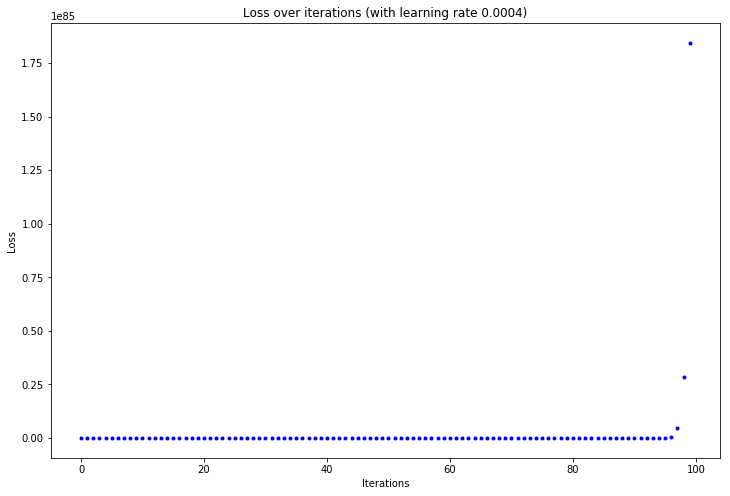

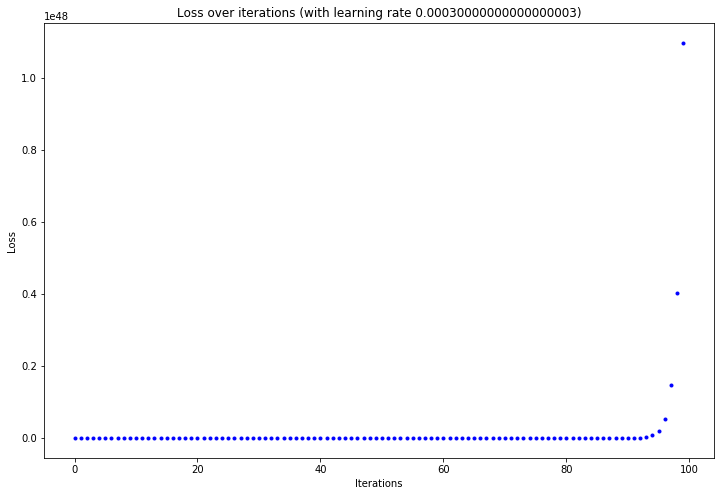

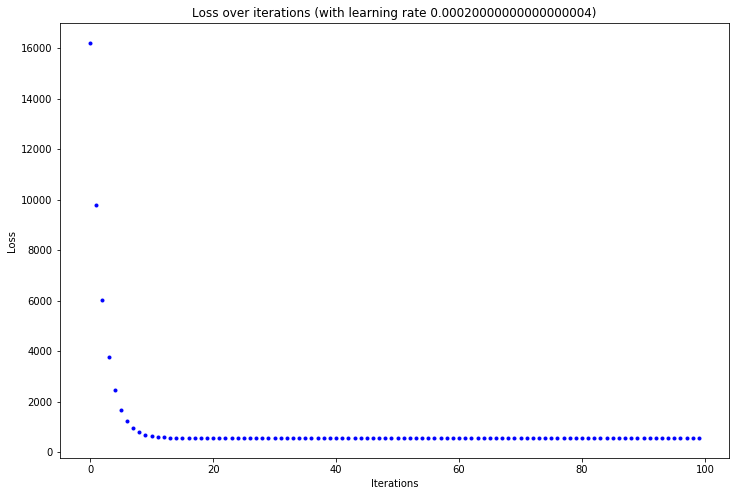

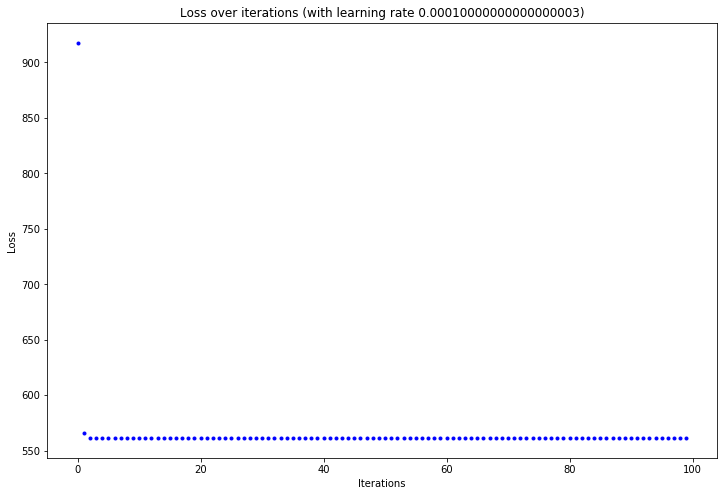

In [39]:
# let's show for general case
learning_rate = 0.0005
for i in range(5):
    b, m, loss_history = run(learning_rate, num_iterations, data)
    plot_GD(learning_rate, num_iterations, loss_history)
    learning_rate -= 0.0001

Starting gradient descent at b = 0, m = 0, error = 18819.74678254601
Running...
After 100 iterations b = -1.5763267123783847e+47, m = -1.0060563953803422e+49, error = 4.1174979323896004e+101
Starting gradient descent at b = 0, m = 0, error = 18819.74678254601
Running...
After 100 iterations b = -6.516969755912143e+33, m = -4.15931484885086e+35, error = 7.037725611926653e+74
Starting gradient descent at b = 0, m = 0, error = 18819.74678254601
Running...
After 100 iterations b = -233798889345729.25, m = -1.492170791829048e+16, error = 9.057864234727837e+35
Starting gradient descent at b = 0, m = 0, error = 18819.74678254601
Running...
After 100 iterations b = 0.01592465810672921, m = 2.1391694266501062, error = 208.83886324613377
Starting gradient descent at b = 0, m = 0, error = 18819.74678254601
Running...
After 100 iterations b = 0.024718667032432945, m = 2.1390316388358035, error = 208.84659859983418


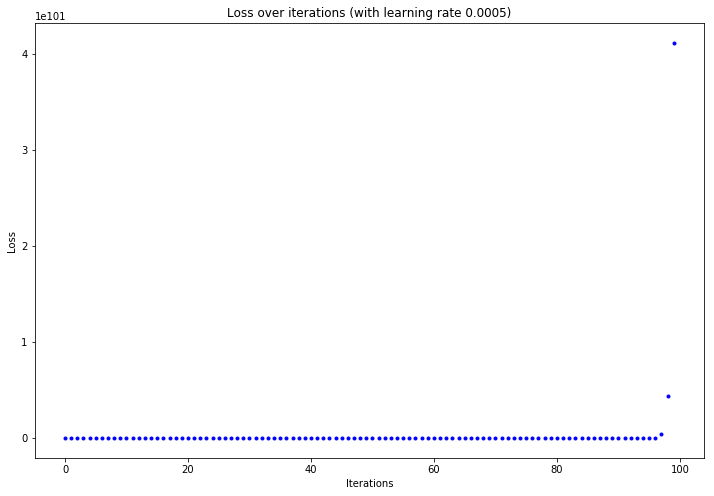

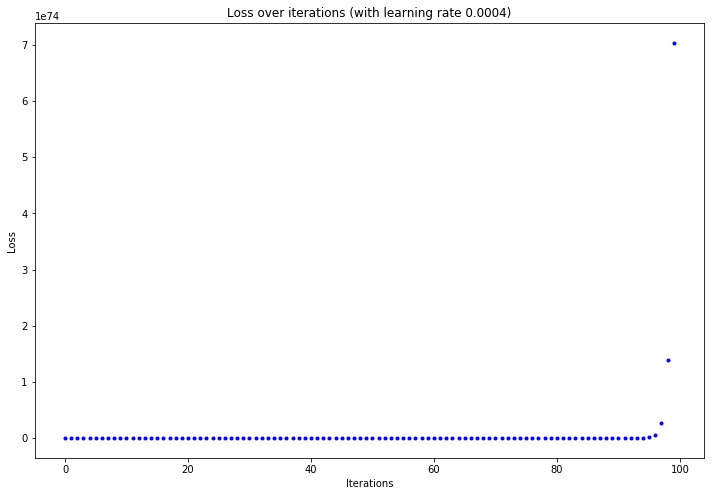

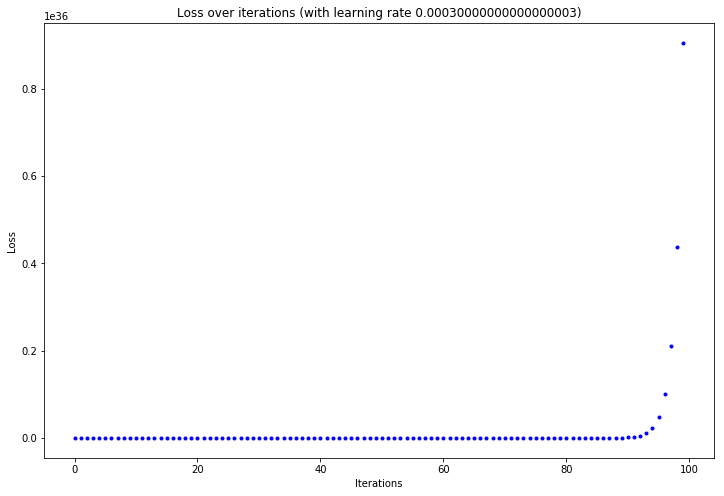

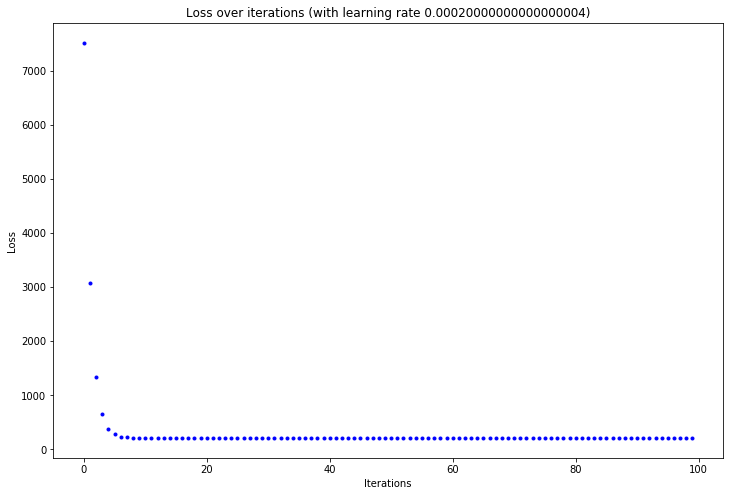

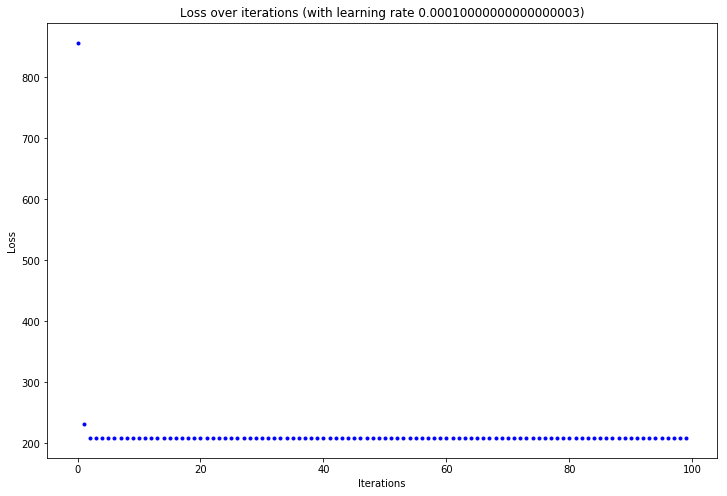

In [40]:
# let's show for female case
learning_rate = 0.0005
for i in range(5):
    b, m, loss_history = run(learning_rate, num_iterations, femaleData)
    plot_GD(learning_rate, num_iterations, loss_history)
    learning_rate -= 0.0001

Starting gradient descent at b = 0, m = 0, error = 35367.928366577085
Running...
After 100 iterations b = -1.8714235089178308e+56, m = -1.2939972026020756e+58, error = 7.995113360214716e+119
Starting gradient descent at b = 0, m = 0, error = 35367.928366577085
Running...
After 100 iterations b = -4.0219247974063416e+43, m = -2.780962947253557e+45, error = 3.692736812815859e+94
Starting gradient descent at b = 0, m = 0, error = 35367.928366577085
Running...
After 100 iterations b = -4.420556237446448e+25, m = -3.056596958380956e+27, error = 4.461021374710092e+58
Starting gradient descent at b = 0, m = 0, error = 35367.928366577085
Running...
After 100 iterations b = 0.02383222268649138, m = 2.714442436799809, error = 186.4433464101273
Starting gradient descent at b = 0, m = 0, error = 35367.928366577085
Running...
After 100 iterations b = 0.03154596068660793, m = 2.71453770341416, error = 186.44908904703584


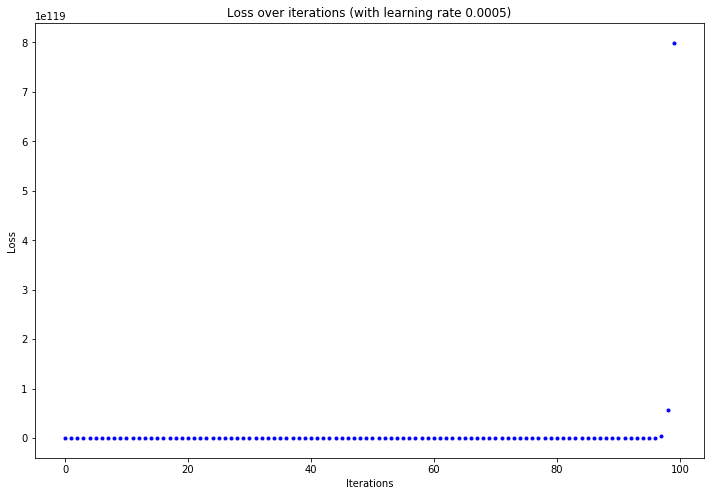

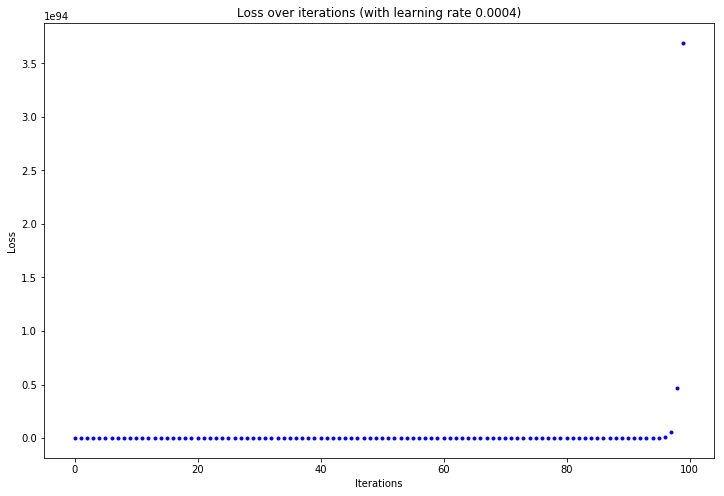

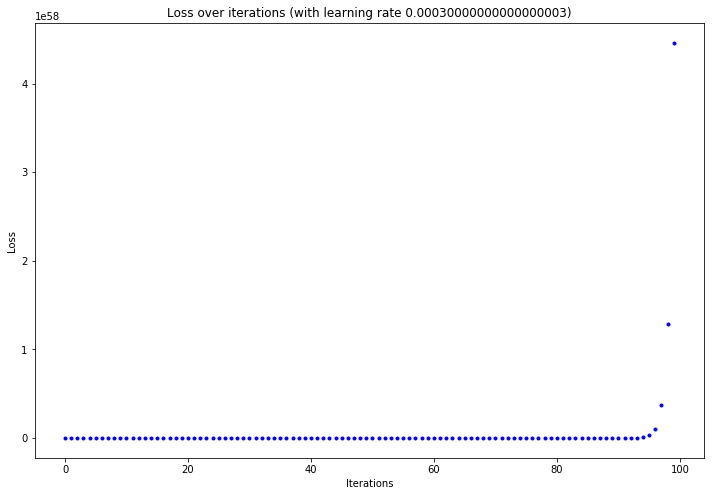

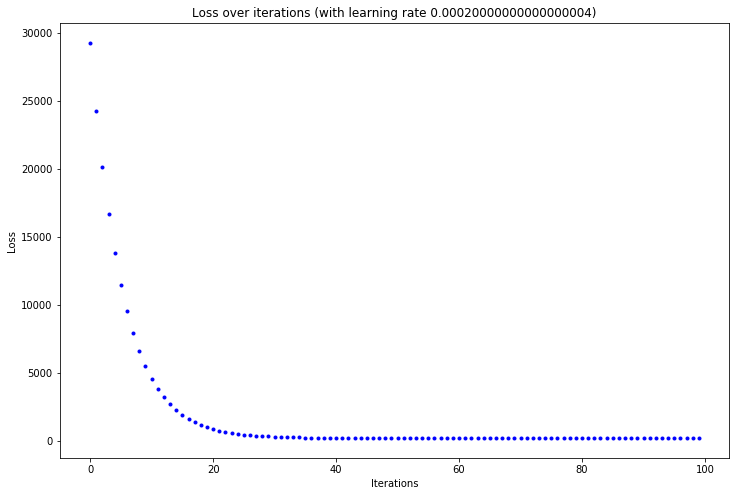

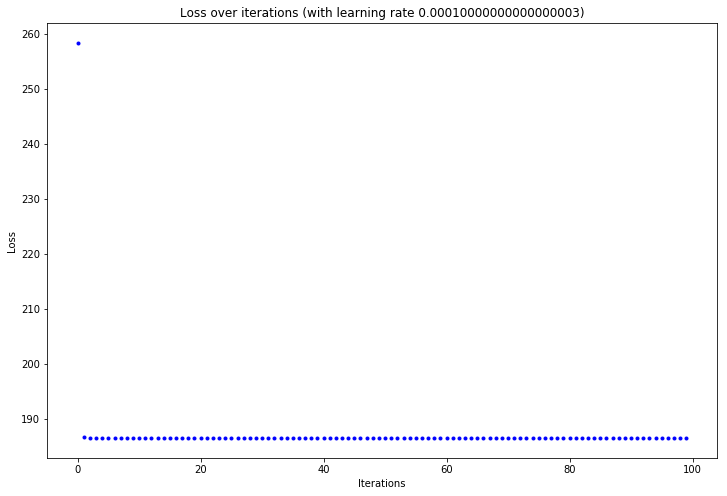

In [41]:
# let's show for male case
learning_rate = 0.0005
for i in range(5):
    b, m, loss_history = run(learning_rate, num_iterations, maleData)
    plot_GD(learning_rate, num_iterations, loss_history)
    learning_rate -= 0.0001

### Plot the regression line you have found
 

In [17]:
def plot_regression(data, gender):
    plt.scatter(data['Weight'].values, data['Height'].values)
    predicted_height = get_predicted_height(data, gender)
    plt.plot(data['Weight'], predicted_height, 'r-')
    plt.title("Linear regression with gradient descent")
    plt.xlabel("Weight")
    plt.ylabel("Height")


def get_predicted_height(data, gender):
    predicted_height = []
    for weight in data['Weight'].values:
        predicted_height.append(coefficients['m ' + gender] * weight + coefficients['b ' + gender])
    return predicted_height

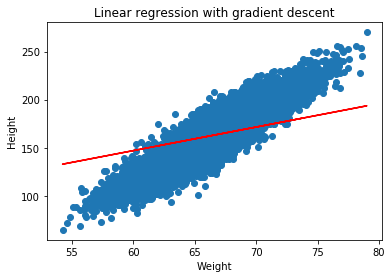

In [18]:
plot_regression(data, 'general')

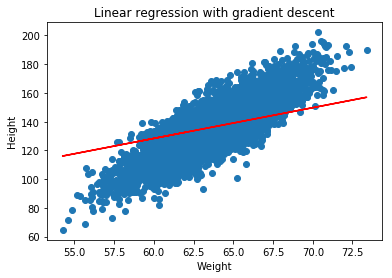

In [19]:
plot_regression(femaleData, 'female')

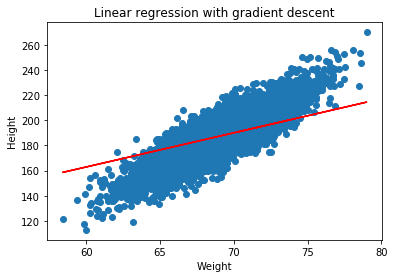

In [20]:
plot_regression(maleData, 'male')